## 앙상블 : 위키피디아 정의 

 

#### Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. 

- 앙상블 기법은 여러 학습 알고리즘을 사용하여 구성 학습 알고리즘만으로 얻을 수있는 것보다 더 나은 예측 성능을 얻습니다 -
 

#### Evaluating the prediction of an ensemble typically requires more computation than evaluating the prediction of a single model.

- 앙상블기법의 예측력을 평가하기 위해서는 일반적으로 단일 모델의 예측을 평가하는 것보다 더 많은 계산이 필요합니다 -
 

## 머신러닝 앙상블 종류  

- 보팅(Voting)
- 배깅(Bagging)
- 부스팅(Boosting)
- 스태킹(Stacking)

# pycaret에서 앙상블 처리하기

## 0.  데이터 세팅하기 

In [2]:
# 데이터 불러오기
from pycaret.datasets import get_data
data = get_data('iris')


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



# 1.  스태킹(Stacking)

- 여러 개의 기본 모델들의 예측 결과를 입력 데이터로 활용하여 새로운 메타 모델을 학습하는 앙상블 기법 중 하나입니다. 
- 스태킹은 모델들이 서로 다른 특성을 잡아내는 것을 활용하므로, 서로 다른 종류의 모델을 조합하여 사용하는 것이 일반적입니다.
- 예를 들어, 선형 모델, 결정 트리, 랜덤 포레스트 등 서로 다른 모델들을 조합하여 사용할 수 있습니다.

![스태킹](../image/스태킹.png)

## 스태킹 처리 절차 

- 학습 데이터를 기반으로 여러 개의 기본 모델들을 학습시킵니다.
- 학습 데이터를 기반으로 각 기본 모델들이 예측한 결과를 새로운 특성(feature)으로 사용하여 메타 모델을 학습시킵니다.
- 테스트 데이터에 대해 각 기본 모델들이 예측한 결과를 새로운 특성으로 사용하여 메타 모델로 예측을 수행합니다.

### 분류 데이터 세팅 


In [3]:
from pycaret.classification import *
clf = setup(data, target='species')

,Description,Value
0,Session id,7144
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


### 분류 모델 설정 및 학습

- 3개의 모델을 개별 생성 

In [4]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [5]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9091,0.9740,0.9091,0.9273,0.9076,0.8625,0.8735
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [6]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
5,0.9000,0.9286,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,0.9286,0.9000,0.9250,0.8971,0.8485,0.8616
8,0.9000,0.9286,0.9000,0.9250,0.8971,0.8485,0.8616


In [7]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


## 모델 스태킹

- stack_models 함수로 스태킹 모델을 생성한다. 

In [9]:
stack_model = stack_models([lr, dt, rf])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [10]:
stack_model

StackingClassifier(cv=5,
                   estimators=[('Logistic Regression',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=1000,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=7144,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('Decision Tree Classifier',
                                DecisionTreeClassifier(ccp_a...
                                                       random_state=7144,
                                                       verbose=0,
                                                       warm_start=False))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=7144,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=True, stack_method='auto', verbose=0)

###  모델 비교

In [11]:
compare_models(include=[lr, dt, rf, stack_model])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.9709,0.9974,0.9709,0.9777,0.9702,0.9559,0.9597,0.1390
2,Random Forest Classifier,0.9618,1.0000,0.9618,0.9705,0.9610,0.9422,0.9470,0.1590
3,Stacking Classifier,0.9618,1.0000,0.9618,0.9705,0.9610,0.9422,0.9470,0.1490
1,Decision Tree Classifier,0.9418,0.9571,0.9418,0.9555,0.9404,0.9119,0.9194,0.1380


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7144, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 예측하기 

In [12]:
prediction = predict_model(stack_model, data=data.iloc[-100:])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.9600,0.0044,0,0,0,0.9200,0.9207


In [13]:
prediction

,sepal_length,sepal_width,petal_length,petal_width,species,prediction_label,prediction_score
50,7.0,3.2,4.7,1.4,Iris-versicolor,Iris-versicolor,0.9580
51,6.4,3.2,4.5,1.5,Iris-versicolor,Iris-versicolor,0.9585
52,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-versicolor,0.6826
53,5.5,2.3,4.0,1.3,Iris-versicolor,Iris-versicolor,0.9580
54,6.5,2.8,4.6,1.5,Iris-versicolor,Iris-versicolor,0.9433
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica,0.9579
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica,0.9260
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica,0.9395
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica,0.9706


# 2. 보팅 (voting)

- 머신러닝 보팅(Voting)은 여러 개의 기본 모델들의 예측 결과를 투표하여 최종 예측을 수행하는 앙상블 기법 중 하나입니다. 

## 보팅의 종류 

### 하드 보팅(Hard Voting) : 
- 다수결 원칙을 적용하여 가장 많은 투표를 얻은 클래스를 선택하는 방법입니다. 
- 즉, 모델들의 예측 결과 중 가장 많은 투표를 얻은 클래스를 최종 예측 결과로 선택합니다.

### 소프트 보팅(Soft Voting) : 
- 모델들의 예측 결과의 확률 값을 평균하여, 가장 높은 확률 값을 가지는 클래스를 선택하는 방법입니다.
- 즉, 모델들의 예측 결과 중 가장 높은 확률 값을 가지는 클래스를 최종 예측 결과로 선택합니다.

### 가중 보팅(Weighted Voting) : 
- 각 모델들에 가중치를 부여하여 예측 결과에 반영하는 방법입니다. 
- 가중치는 각 모델의 성능이나 신뢰도에 따라 결정될 수 있습니다.

![보팅](../image/보팅.png)

### 하드보팅 하기 

In [14]:
vote3_hard = blend_models(estimator_list=[lr, dt, rf], method='hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### 소프트 보팅하기 

In [15]:
vote3_soft = blend_models(estimator_list=[lr, dt, rf], method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
5,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### 모델 평가하기 

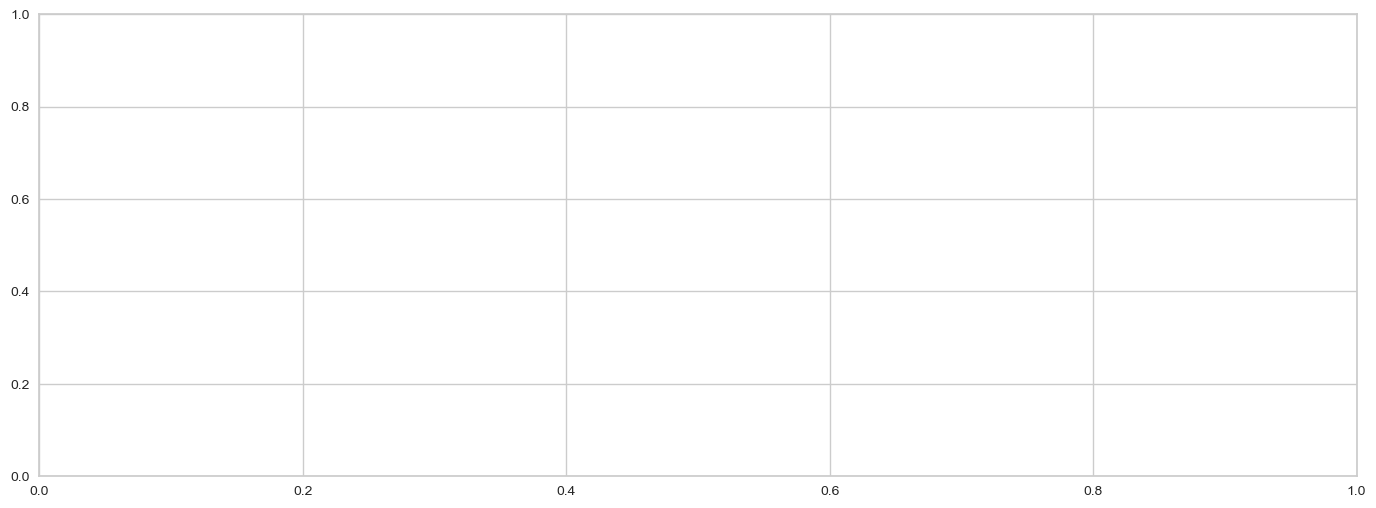

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
evaluate_model(vote3_soft)

### 모델 예측 하기 

In [16]:
prediction = predict_model(vote3_soft, data=data.iloc[-100:])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9400,0.0052,0,0,0,0.8800,0.8800


In [17]:
prediction

,sepal_length,sepal_width,petal_length,petal_width,species,prediction_label,prediction_score
50,7.0,3.2,4.7,1.4,Iris-versicolor,Iris-versicolor,0.9146
51,6.4,3.2,4.5,1.5,Iris-versicolor,Iris-versicolor,0.9421
52,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-virginica,0.5852
53,5.5,2.3,4.0,1.3,Iris-versicolor,Iris-versicolor,0.9736
54,6.5,2.8,4.6,1.5,Iris-versicolor,Iris-versicolor,0.9272
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica,0.9631
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica,0.9045
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica,0.9365
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica,0.9769


# 3. 배깅처리

- 배깅(Bagging)은 부트스트랩(bootstrap) 샘플링을 활용하여 여러 개의 기본 모델을 독립적으로 학습하고, 이들의 예측을 평균 또는 투표를 통해 최종 예측을 수행하는 앙상블 기법입니다. 
- 배깅은 분산 감소와 과적합(overfitting)을 줄이는 데에 효과적입니다.

### 부트스트랩(bootstrap) 

- 통계학에서 사용하는 용어로, random sampling을 적용하는 방법을 일컫는 말입니다. 
- 예를 들어, 한 식자재마트에 들어오는 상추의 신선도를 알고 싶은 경우, 마트로 입고되는 모든 상추 중 임의로 100개를 뽑아 그 상추의 신선도 평균을 구하는게 되겠습니다.

- 이게 무슨 의미가 있을까요? 바로 raw data의 분포를 추정할 때 사용할 수 있습니다. 
- 예를 들어, 측정된 데이터 중에서 중복을 허용한 복원 추출로 n개를 뽑고, 뽑은 n개의 평균을 구하는 것을 m번 반복하여 모으게 되면 평균에 대한 분포를 구할 수 있게 되고, 이로부터 sample mean에 대한 신뢰 구간을 추정할 수 있게 되는 겁니다.

![배깅](../image/배깅.png)

### 배깅 앙상블 모델 생성

- ensemble_model 함수에서 메서드에 Bagging을 표시

In [18]:
bagged_model = ensemble_model(dt, n_estimators=10,method='Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### 모델 평가

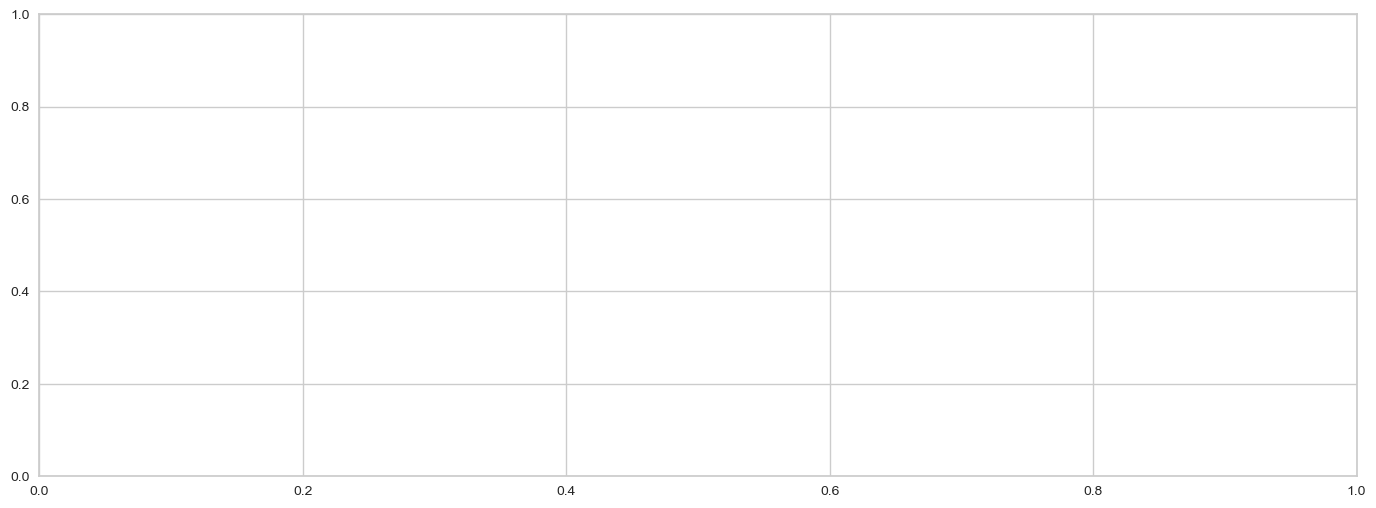

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
evaluate_model(bagged_model)

### 모델 예측하기

In [20]:
prediction = predict_model(bagged_model, data=data.iloc[-100:])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9400,0.0170,0,0,0,0.8800,0.8807


In [21]:
prediction

,sepal_length,sepal_width,petal_length,petal_width,species,prediction_label,prediction_score
50,7.0,3.2,4.7,1.4,Iris-versicolor,Iris-versicolor,1.0
51,6.4,3.2,4.5,1.5,Iris-versicolor,Iris-versicolor,1.0
52,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-virginica,0.8
53,5.5,2.3,4.0,1.3,Iris-versicolor,Iris-versicolor,1.0
54,6.5,2.8,4.6,1.5,Iris-versicolor,Iris-versicolor,1.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica,1.0
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica,1.0
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica,1.0
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica,1.0


# 4. 부스팅처리

- 부스팅(Boosting)은 약한 학습기(weak learner)를 여러 개 결합하여 강한 학습기(strong learner)를 만드는 앙상블 기법 중 하나입니다. 
- 부스팅 알고리즘은 각 학습기를 순차적으로 학습시키며, 이전 학습기가 잘못 분류한 샘플에 대해서는 가중치를 높여 다음 학습기에서 더욱 집중적으로 학습시킵니다. 
- 이를 반복하면서 샘플의 분류 정확도를 높이는 방식으로 학습합니다.

![부스팅](../image/부스팅.png)

### 부스팅 앙상블 모델 생성

In [22]:
boosting_model = ensemble_model(dt, n_estimators=10,method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,0.9286,0.9000,0.9250,0.8971,0.8485,0.8616
8,0.9000,0.9286,0.9000,0.9250,0.8971,0.8485,0.8616


In [23]:
boosting_model

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         random_state=7144,
                                                         splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=7144)

### 예측하기

In [24]:
prediction = predict_model(boosting_model, data=data.iloc[-100:])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9500,0.0500,0,0,0,0.9000,0.9016


In [25]:
prediction

,sepal_length,sepal_width,petal_length,petal_width,species,prediction_label,prediction_score
50,7.0,3.2,4.7,1.4,Iris-versicolor,Iris-versicolor,1.0
51,6.4,3.2,4.5,1.5,Iris-versicolor,Iris-versicolor,1.0
52,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-versicolor,1.0
53,5.5,2.3,4.0,1.3,Iris-versicolor,Iris-versicolor,1.0
54,6.5,2.8,4.6,1.5,Iris-versicolor,Iris-versicolor,1.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica,1.0
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica,1.0
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica,1.0
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica,1.0


### 모델 평가

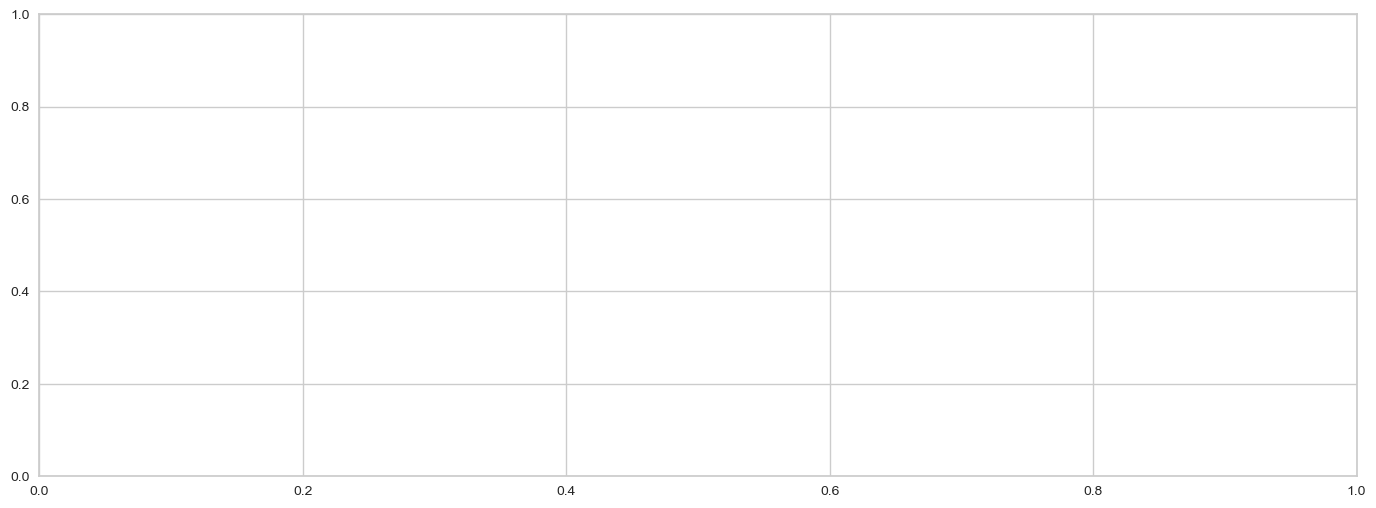

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [26]:
evaluate_model(boosting_model)

# 5. 앙상블 모델 비교 

### 앙상블로 생성한 모델을 compare_models로 비교하기

In [28]:
en_best_model = compare_models(include=[stack_model, bagged_model, vote3_soft, boosting_model])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Stacking Classifier,0.9618,1.0000,0.9618,0.9705,0.9610,0.9422,0.9470,0.1560
1,Decision Tree Classifier,0.9618,0.9929,0.9618,0.9705,0.9610,0.9422,0.9470,0.1460
3,Decision Tree Classifier,0.9609,0.9714,0.9609,0.9702,0.9599,0.9408,0.9458,0.1610
2,Voting Classifier,0.9518,1.0000,0.9518,0.9630,0.9507,0.9270,0.9332,0.1640


In [29]:
en_best_model

StackingClassifier(cv=5,
                   estimators=[('Logistic Regression',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=1000,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=7144,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('Decision Tree Classifier',
                                DecisionTreeClassifier(ccp_a...
                                                       random_state=7144,
                                                       verbose=0,
                                                       warm_start=False))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=7144,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=True, stack_method='auto', verbose=0)